In [31]:
#import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import matplotlib
sns.set_style(style ='darkgrid')
from matplotlib.pyplot import figure

%matplotlib inline

In [2]:
#import the data using pandas
# The data contain the names, Height, Weight, Country/Team,and the Gender of the Athletes
df = pd.read_excel(r'C:\Users\ADENIRAN\Desktop\Height-and-Weight.xlsx')

In [3]:
# we have 1587 rows and 6 columns 
df.shape

(1587, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Second name   1587 non-null   object
 1   First name    1586 non-null   object
 2   Height(cm)    1587 non-null   int64 
 3   Weight(kg)    1587 non-null   int64 
 4   Country/Team  1587 non-null   object
 5   Gender        1587 non-null   object
dtypes: int64(2), object(4)
memory usage: 74.5+ KB


In [5]:
# checking the first five rows of the df
df.head()

,Second name,First name,Height(cm),Weight(kg),Country/Team,Gender
0,Abbadi,Ilyas,170,69,Algeria,M
1,Abbate,Simona,171,64,Italy,W
2,Abdelaal,Hesham,167,52,Egypt,M
3,Abdulrahman,Amer,168,68,United Arab Emirates,M
4,Abian,Pablo,177,78,Spain,M


In [28]:
# Checking if there are missing values 
pd.set_option('display.max_rows', None)
print(df.isnull().sum())
# There is 1 missing value in the column for the first name which won't be useful during my analysis

Second name     0
First name      1
height          0
weight          0
Country/Team    0
Gender          0
dtype: int64


In [7]:
# Renaming the Height(cm) and Weight(kg) columns
df.rename(columns={"Height(cm)":"height","Weight(kg)":"weight"},inplace= True)

In [27]:
# countinng the values for Male and Female Athletes
df['Gender'].value_counts()
# we have 869 Male Athletes and 718 Female Athletes
869+718

1587

In [26]:
#let's start by looking the correlation between the heights and the weights of our df
# Note: Correlation is based on numerical values only 
df.corr(method='pearson')

,height,weight
height,1.000000,0.774625
weight,0.774625,1.000000


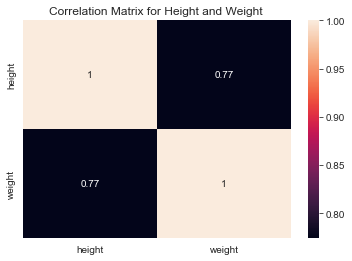

In [10]:
#Creating the heatmap correlation
correlation_matrix= df.corr(method='pearson')

plt.title('Correlation Matrix for Height and Weight ')

sns.heatmap(correlation_matrix, annot=True)
plt.show()

<Axes: title={'center': 'Scatter plot for both Male and Female Athletes'}, xlabel='height', ylabel='weight'>

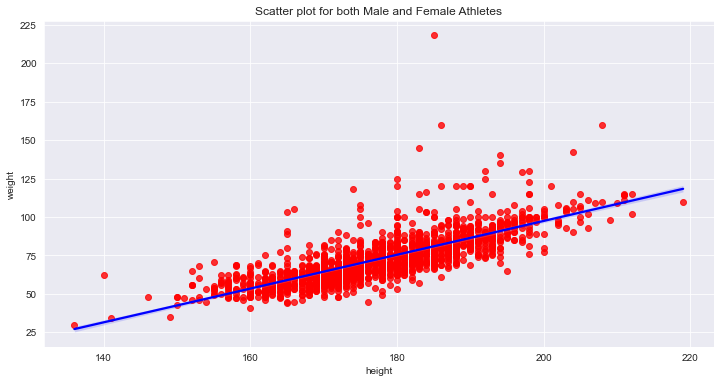

In [32]:
plt.figure(figsize=(12,6))

plt.title('Scatter plot for both Male and Female Athletes')

sns.regplot(x='height', y='weight', data= df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

# There is a Positive Relationship/Correlation between the heights and Weights of Both Male and Female Athletes 
# The higher the "height", the greater the "weight"

In [24]:
# Finding the Correlation between the heights and weights of Male Athletes only 
#creating a df for the heights and weights of Male Athletes
male_df = df[df['Gender']=='M']
male_df.head()

,Second name,First name,height,weight,Country/Team,Gender
0,Abbadi,Ilyas,170,69,Algeria,M
2,Abdelaal,Hesham,167,52,Egypt,M
3,Abdulrahman,Amer,168,68,United Arab Emirates,M
4,Abian,Pablo,177,78,Spain,M
5,Abrantes,Arnaldo,184,78,Portugal,M


<Axes: title={'center': 'Scatter plot for Male Athletes'}, xlabel='height', ylabel='weight'>

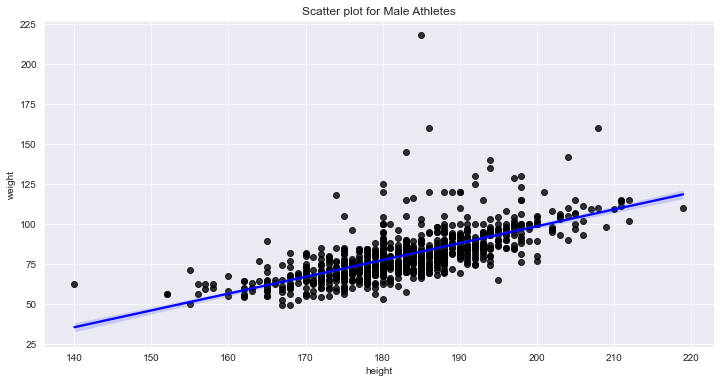

In [13]:
# Scatter plot for Male Athletes only 
plt.figure(figsize=(12,6))

plt.title('Scatter plot for Male Athletes')

sns.regplot(x='height', y='weight', data= male_df, scatter_kws={"color":"black"}, line_kws={"color":"blue"})

In [14]:
# The males have greater heights compared to the females 

In [23]:
# Creating a df also for the female Athletes
female_df =df[df['Gender']=='W']
female_df.head()

,Second name,First name,height,weight,Country/Team,Gender
1,Abbate,Simona,171,64,Italy,W
6,Abril,Erika,158,47,Colombia,W
10,Achour,Dallal Merwa,176,45,Algeria,W
14,Adams,Nicola,164,51,Team GB,W
16,Adeoye,Margaret,162,65,Team GB,W


<Axes: title={'center': 'Scatter plot for Female Athletes'}, xlabel='height', ylabel='weight'>

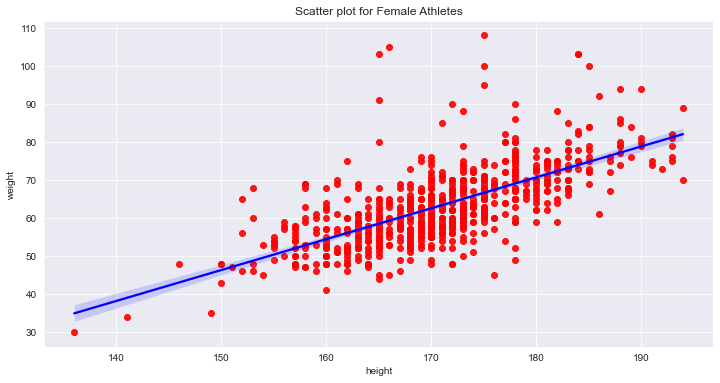

In [16]:
# Creating the scatter plot for Female Athletes only 
plt.figure(figsize=(12,6))

plt.title('Scatter plot for Female Athletes')

sns.regplot(x='height', y='weight', data= female_df, scatter_kws={"color":"red","alpha":0.9}, line_kws={"color":"blue"})

In [30]:
# The females have greater weights than heights

In [35]:
male_with_heighest_height = male_df.loc[male_df['height'].idxmax()]
male_with_heighest_height

Second name       Zhang
First name      Zhaoxu 
height              219
weight              110
Country/Team      China
Gender                M
Name: 1578, dtype: object

# Male Athletes with heighest height(cm) 
### Name: Zhaoxu Zhang
### Country: China
### Gender: Male 
### Height: 185cm
### Weight: 110kg

In [34]:
male_with_heighest_weight = male_df.loc[male_df['weight'].idxmax()]
male_with_heighest_weight

Second name      Blas Jr
First name      Ricardo 
height               185
weight               218
Country/Team        Guam
Gender                 M
Name: 141, dtype: object

# Male with the highest weight(kg)
### Name: Ricardo Bias Jr
### Country: Guam
### Gender: Male
### Height: 185
### Weight: 218

In [33]:
female_with_highest_height = female_df.loc[female_df['height'].idxmax()]
female_with_highest_height

Second name      Michel
First name       Ciara 
height              194
weight               70
Country/Team    Team GB
Gender                W
Name: 920, dtype: object

# Female with the highest Height(cm)
### Name: Ciara Michel
### Country: Team GB
### Gender: Female
### Height: 194
### Weight: 70

In [36]:
female_with_highest_weight = female_df.loc[female_df['weight'].idxmax()]
female_with_highest_weight

Second name        Gong
First name      Lijiao 
height              175
weight              108
Country/Team      China
Gender                W
Name: 499, dtype: object

# Female with the highest Weight(cm)
### Name: Lijiao Gong
### Country: China
### Gender: Female
### Height: 175
### Weight: 108